<a href="https://colab.research.google.com/github/gn1dus/MathL/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [2]:
!pip install pandas scikit-learn seaborn scipy

In [3]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [4]:
# Загрузка набора данных
df = pd.read_csv('/content/germany.csv')

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany
...,...,...,...,...,...,...,...,...
9490,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713,Germany
9491,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713,Germany
9492,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713,Germany
9493,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713,Germany


In [6]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: InvoiceNo
колонка: StockCode
колонка: Description
колонка: Quantity
колонка: InvoiceDate
колонка: UnitPrice
колонка: CustomerID
колонка: Country


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9495 non-null   object 
 1   StockCode    9495 non-null   object 
 2   Description  9495 non-null   object 
 3   Quantity     9495 non-null   int64  
 4   InvoiceDate  9495 non-null   object 
 5   UnitPrice    9495 non-null   float64
 6   CustomerID   9495 non-null   int64  
 7   Country      9495 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 593.6+ KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [8]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [9]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Quantity'] = np.nan

In [10]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

InvoiceNo      0
StockCode      0
Description    0
Quantity       5
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [11]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [12]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.Quantity = df_median.Quantity.fillna(df_median.Quantity.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [13]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Quantity = df_mean.Quantity.fillna(df_median.Quantity.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


4. **Выбираем целвую переменную**

"large_order" на основе количества проданных товаров. я сделал целевую переменную, которая покажет, был ли заказ крупным. например если продано больше 10 единиц одного товара

In [14]:
df['large_order'] = np.where(df['Quantity'] > 10, 1, 0).astype(int)


In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'large_order'],
      dtype='object')

In [16]:
Y = df['large_order'] # выбираем целевую переменную (категориальную)
X = df.drop(['large_order', 'Quantity'], axis=1)



5. **Графический анализ**

In [17]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,UnitPrice,CustomerID
0,2.95,12662
1,2.55,12662
2,0.85,12662
3,1.65,12662
4,1.95,12662
...,...,...
9490,1.25,12713
9491,0.85,12713
9492,0.85,12713
9493,2.08,12713


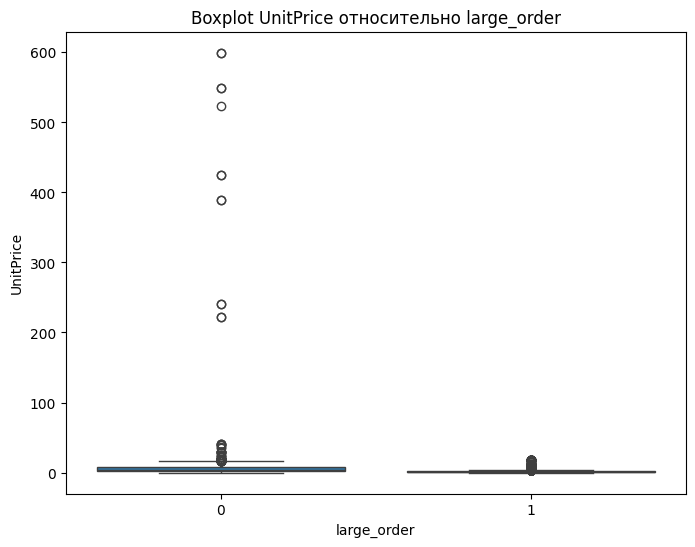

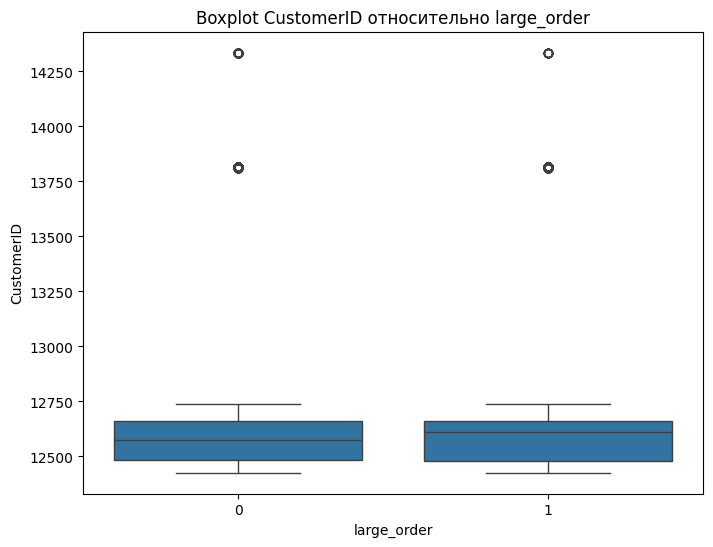

In [25]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='large_order', y=col, data=df)
    plt.title(f'Boxplot {col} относительно large_order')

    plt.show()


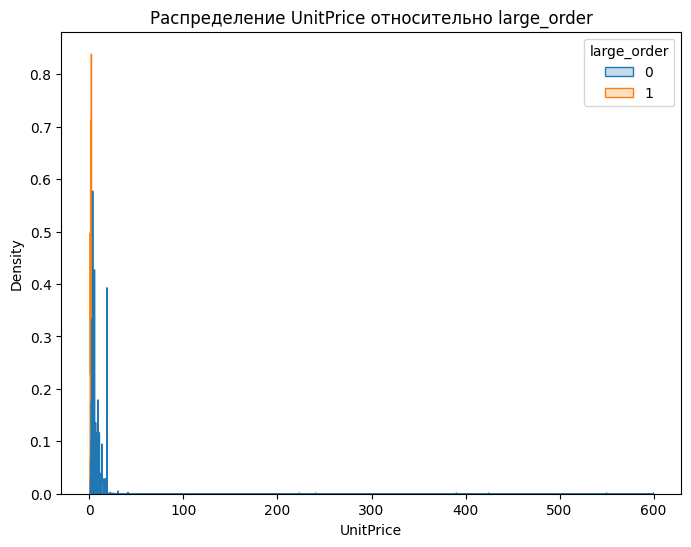

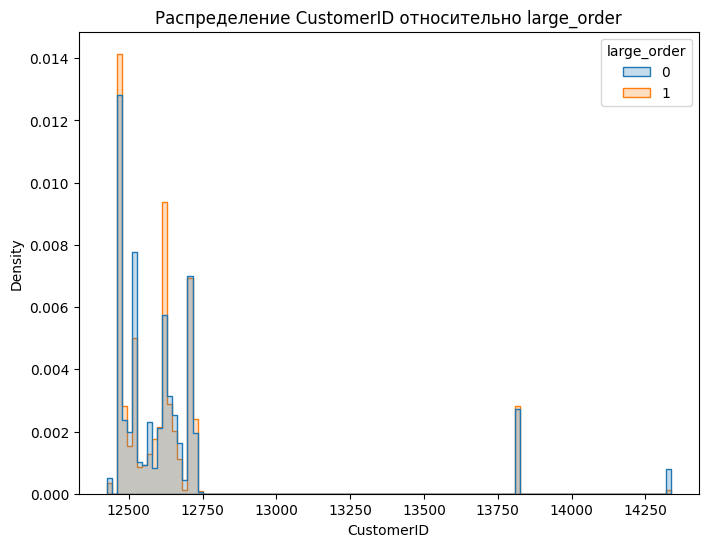

In [19]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='large_order', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно large_order')
    plt.show()


ЧТО МОЖНА СКАЗАТЬ ПО ГРАФИКАМ!!
1. БОКСПЛОТЫ
UnitPrice:
видны выбросы особенно для заказов с меньшим объемом 0, эт может означать, что для малых заказов иногда покупаются товары с очень высокой ценой, а для заказов с большим объемом 1 распределение цен более стабильное и без особых выбросов.
CustomerID:
нет особых различий в распределении CustomerID между заказами с большим объемом (1) и меньшим (0), ноо есть несколько выбросов которые могут принадлжать уникальным клиентам с высокими ID
2.ДИАГРАММЫ
малые заказы (синий цвет) имеют более широкое распределение цен с редкими высокими значениями, в то время как большие заказы (оранжевый) сосредоточены вокруг более низких цен

In [27]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('large_order')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('large_order')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [21]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('large_order')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для UnitPrice:

              count      mean        std   min   25%   50%   75%    max
large_order                                                            
0            3722.0  7.468818  25.940665  0.00  2.55  4.15  7.95  599.5
1            5773.0  1.709174   1.913068  0.04  0.85  1.25  1.95   18.0


Описательная статистика для CustomerID:

              count          mean         std      min      25%      50%  \
large_order                                                                
0            3722.0  12655.596454  337.451860  12426.0  12481.0  12572.0   
1            5773.0  12640.042092  289.285922  12426.0  12479.0  12609.0   

                 75%      max  
large_order                    
0            12662.0  14335.0  
1            12662.0  14335.0  




In [22]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


InvoiceNo                     StockCode                     \
                count unique     top freq     count unique    top freq   
large_order                                                              
0                3722    581  555383  132      3722    929   POST  349   
1                5773    429  540458   92      5773   1225  22554   59   

            Description                                                \
                  count unique                               top freq   
large_order                                                             
0                  3722    944                           POSTAGE  349   
1                  5773   1244  PLASTERS IN TIN WOODLAND ANIMALS   59   

            InvoiceDate                             Country                  \
                  count unique             top freq   count unique      top   
large_order                                                                   
0                  3722    576  6/2/2011 15:13  132    3722      1  Germany   
1                  5773    425  1/7/2011 12:28   92    5773      1  Germany   

                   
             freq  
large_order        
0            3722  
1            5773

#### 1. ** UnitPrice**:
   - сред цена за единицу товара для заказов меньшего объёма составляет 7.47, что значительно выше, чем у крупных заказовгде средняя цена составляет 1.71.
    - стандарт отклонение для меньших заказов (25.94) намного выше, чем для крупных заказов (1.91), это может указаить на больший разброс цен в небольших заказах.
    - мин. значения цены близки к нулю в обеих группах, но макс цена для небольших заказов достигает 599.5, как для крупных заказов макс цена составляет 18.0
    -
#### 2. **CustomerID**:
   - тут сред значение id покупателя для небольших заказов составляет 12655,а для крупных заказов (12640),  разница незначительна
   - стандартное отклонение немного выше в группе небольших заказов (337.45) по сравнению с крупными заказами (289.29)
   - мин значение айди одинаково в обеих группах — 12426, а макс значения достигают 14335
   -
### Вывод:
  - UnitPrice: стоимость единицы товара для небольших заказов заметно выше и более разнообразна, что может нам гворить о том что для крупных заказов покупатели предпочитают более дешёвые товары
  - CustomerID: в распределении id покупателей больших различий между большими и малыми заказами нет. это может означать, что одни и те же покупатели могут делать как большие, так и малые заказы

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [28]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Quantity,UnitPrice,CustomerID,large_order,log_UnitPrice
Quantity,1.000000,-0.087000,-0.025683,0.416192,-0.331953
UnitPrice,-0.087000,1.000000,0.028412,-0.169918,0.463167
CustomerID,-0.025683,0.028412,1.000000,-0.024565,0.007429
large_order,0.416192,-0.169918,-0.024565,1.000000,-0.617261
log_UnitPrice,-0.331953,0.463167,0.007429,-0.617261,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **Quantity и UnitPrice:**:
   - кэфф коррел: -0.087
  - интерпретация: между количеством заказанных товаров и ценой за единицу товара наблюдается слабая отрицательная корреляция.  это нам говорит о том, что с увеличением количества товаров в заказе цена за единицу товара может немного снижаться. это может быть связано с различными скидками на большие заказы или покупкой оптом  дешёвых товаров

2. **Quantity и CustomerID (-0.0257)**:
   -  очень слабая отрицательная корреляция между колвом товаров в заказе и айди покупателя. Это указывает нам практически полное отсутствие связи между этими двумя переменными.

3. **Quantity и large_order (0.416)**:
   - Как и ожидалось, заказы с большим количеством товаров чаще попадают в категорию "больших заказов" эта связь ожидаема, т.к переменная large_order должна отражать более крупные заказы

4. **UnitPrice и CustomerID (0.028)**:
   -  нет особой связи между тем, кто покупатель, и ценой товаров, которые он покупает

5. **UnitPrice и large_order ( -0.170)**:
   - слабая отрицательная корр, это может говорить нам, что более крупные заказы включают товары с немного более низкой ценой. как я уже писал цена на оптовые или большие заказы могут быть связаны с более дешевыми товарами или скидками



## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country']


In [31]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [32]:
X_processed

,UnitPrice,InvoiceNo_536840,InvoiceNo_536861,InvoiceNo_536967,InvoiceNo_536983,InvoiceNo_537197,InvoiceNo_537198,InvoiceNo_537201,InvoiceNo_537212,InvoiceNo_537250,...,CustomerID_12738,CustomerID_13810,CustomerID_13811,CustomerID_13812,CustomerID_13813,CustomerID_13814,CustomerID_13815,CustomerID_13816,CustomerID_13817,CustomerID_14335
0,2.95,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.55,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.65,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.95,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,1.25,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9491,0.85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9492,0.85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9493,2.08,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['UnitPrice']


In [34]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [35]:
X_processed

,UnitPrice,InvoiceNo_536840,InvoiceNo_536861,InvoiceNo_536967,InvoiceNo_536983,InvoiceNo_537197,InvoiceNo_537198,InvoiceNo_537201,InvoiceNo_537212,InvoiceNo_537250,...,CustomerID_12738,CustomerID_13810,CustomerID_13811,CustomerID_13812,CustomerID_13813,CustomerID_13814,CustomerID_13815,CustomerID_13816,CustomerID_13817,CustomerID_14335
0,0.004921,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.004254,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.001418,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.002752,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.003253,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,0.002085,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9491,0.001418,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9492,0.001418,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9493,0.003470,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [36]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [37]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9368
Точность на тестовой выборке: 0.8678

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       744
           1       0.87      0.93      0.89      1155

    accuracy                           0.87      1899
   macro avg       0.87      0.85      0.86      1899
weighted avg       0.87      0.87      0.87      1899



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [38]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                         Feature  Coefficient
0                      UnitPrice    -2.973143
1798             StockCode_23240    -1.905649
4404  InvoiceDate_6/2/2011 15:13    -1.707832
179             InvoiceNo_555383    -1.707832
151             InvoiceNo_552978     1.626940
...                          ...          ...
2074            StockCode_72351B     0.000000
680              StockCode_20766     0.000000
2077            StockCode_72807A     0.000000
2082             StockCode_72817     0.000000
1151             StockCode_22228     0.000000

[4666 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [39]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8081
Отклонение точности: 0.0288


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

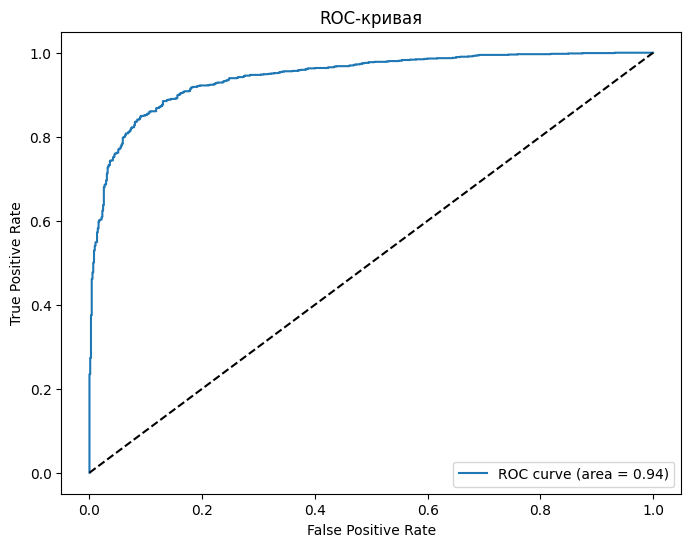

In [41]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---